In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [74]:
import os
import joblib

In [72]:
#Import All the Regression Libraries
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, HuberRegressor

In [130]:
#Import the  necessary evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
#Load the data free from Missing Values
absent = pd.read_csv('absent_NA_free.csv')

In [3]:
absent

,Unnamed: 0,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
5,5,3,23.0,7.0,6,1,179.0,51.0,18.0,38.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,3.0
6,6,10,22.0,7.0,6,1,225.0,52.0,3.0,28.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,8.0
7,7,20,23.0,7.0,6,1,260.0,50.0,11.0,36.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0
8,8,14,19.0,7.0,2,1,155.0,12.0,14.0,34.0,...,0.0,1.0,2.0,1.0,0.0,0.0,95.0,196.0,25.0,40.0
9,9,1,22.0,7.0,2,1,235.0,11.0,14.0,37.0,...,0.0,3.0,1.0,0.0,0.0,1.0,88.0,172.0,29.0,8.0


In [9]:
#Remove the Unnamed column
#absent = absent.drop('Unnamed: 0', axis = 1)

In [10]:
absent.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [6]:
#Set the variable target
target = "Absenteeism time in hours"

In [7]:
absent.shape

(740, 22)

In [8]:
np.unique(absent["Month of absence"])

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.])

In [15]:
len(absent.index)

740

In [16]:
len(absent[target])

740

## Plotting the target

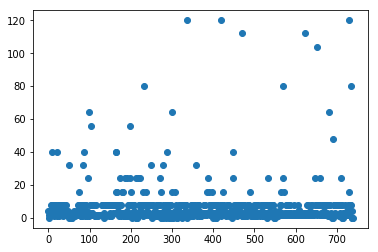

In [18]:
plt.scatter(absent.index, absent[target])

## Converting the data into Time Series Format

In [32]:
#Combining the two columns
absent_month_wise = absent.groupby("Month of absence")

In [33]:
absent_month_wise.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26.0,7.0,3,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36,0.0,7.0,3,1,118.0,13.0,18.0,50.0,239554.0,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3,23.0,7.0,4,1,179.0,51.0,18.0,38.0,239554.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7,7.0,7.0,5,1,279.0,5.0,14.0,39.0,239554.0,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11,23.0,7.0,5,1,289.0,36.0,13.0,33.0,239554.0,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0
19,33,23.0,8.0,4,1,248.0,25.0,14.0,47.0,205917.0,...,0.0,1.0,2.0,0.0,0.0,1.0,86.0,165.0,32.0,2.0
20,18,10.0,8.0,4,1,330.0,16.0,4.0,28.0,205917.0,...,0.0,2.0,0.0,0.0,0.0,0.0,84.0,182.0,25.0,3.0
21,3,11.0,8.0,2,1,179.0,51.0,18.0,38.0,205917.0,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,1.0
22,10,13.0,8.0,2,1,361.0,52.0,3.0,28.0,205917.0,...,0.0,1.0,1.0,1.0,0.0,4.0,80.0,172.0,27.0,40.0
23,20,28.0,8.0,6,1,260.0,50.0,11.0,36.0,205917.0,...,0.0,1.0,4.0,1.0,0.0,0.0,65.0,168.0,23.0,4.0


In [34]:
absent_month_index = absent.set_index("Month of absence")

In [35]:
absent_month_index = absent.set_index(["Month of absence", "ID"])

In [36]:
absent_month_index

Reason for absence  Day of the week  Seasons  \
Month of absence ID                                                 
7.0              11                26.0                3        1   
                 36                 0.0                3        1   
                 3                 23.0                4        1   
                 7                  7.0                5        1   
                 11                23.0                5        1   
                 3                 23.0                6        1   
                 10                22.0                6        1   
                 20                23.0                6        1   
                 14                19.0                2        1   
                 1                 22.0                2        1   
                 20                 1.0                2        1   
                 20                 1.0                3        1   
                 20                11.0                4        1   
                 3                 11.0                4        1   
                 3                 23.0                4        1   
                 24                14.0                6        1   
                 3                 23.0                6        1   
                 3                 21.0                2        1   
                 6                 11.0                5        1   
8.0              33                23.0                4        1   
                 18                10.0                4        1   
                 3                 11.0                2        1   
                 10                13.0                2        1   
                 20                28.0                6        1   
                 11                18.0                2        1   
                 10                25.0                2        1   
                 11                23.0                3        1   
                 30                28.0                4        1   
                 11                18.0                4        1   
                 3                 23.0                6        1   
...                                 ...              ...      ...   
6.0              23                22.0                5        3   
                 36                19.0                5        3   
                 12                19.0                6        3   
                 22                27.0                6        3   
                 2                  0.0                2        3   
                 21                 0.0                2        3   
                 36                19.0                5        3   
                 22                13.0                5        3   
                 15                28.0                5        3   
                 22                13.0                2        1   
                 34                25.0                2        1   
                 12                22.0                5        1   
                 34                 8.0                6        1   
                 34                10.0                4        1   
                 12                22.0                4        1   
7.0              5                 26.0                4        1   
                 12                19.0                6        1   
                 9                  6.0                2        1   
                 34                28.0                2        1   
                 9                  6.0                3        1   
                 6                 22.0                3        1   
                 34                23.0                4        1   
                 10                22.0                4        1   
                 28                22.0                4        1   
                 13                13.0                2        1   
                 11

In [37]:
#help(absent_month_wise.aggregate)

In [38]:
#Create a dictionary of average hours of absenteeism
for ind in absent_month_index.index.levels[0]:
    print(ind)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0


In [39]:
#Calculate the aggregate mean per group
mean_hours_per_month = absent_month_wise.aggregate('mean')

In [40]:
def plotting(data, x, y, file_name, t="scatter"):
    if(t=="hist"):
        plt.hist(data[y])
        plt.xlabel(y)
        plt.ylabel("Frequency Count")
        return plt
    elif(t=="line"):
        if(x=="index"):
            plt.plot(data.index, data[y])
        else:
            plt.plot(data[x], data[y])
    else:
        if(x=="index"):
            plt.plot(data.index, data[y])
        else:
            plt.scatter(data[x], data[y])
            
    plt.title(x + " V/S " + y)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.savefig(file_name)
    return plt

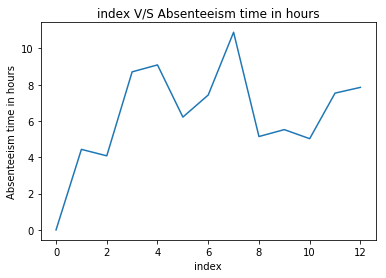

'\nplt.plot(mean_hours_per_month.index, mean_hours_per_month[target])\n\nplt.xlabel("Months")\n\nplt.ylabel("Average Hours")\n\nplt.title("Average Hours of Absenteeism per Month")\n\nplt.show()\n'

In [70]:
#Plot Month V/S Target
result_plot = plotting(mean_hours_per_month, "index", target, "Mean Hours of Absenteeism Per Month.png", "line")
result_plot.show()

'''
plt.plot(mean_hours_per_month.index, mean_hours_per_month[target])

plt.xlabel("Months")

plt.ylabel("Average Hours")

plt.title("Average Hours of Absenteeism per Month")

plt.show()
'''

In [42]:
print("Maximum Average Hours:-{}" .format(max(mean_hours_per_month[target])))

Maximum Average Hours:-10.895522388059701


In [43]:
print("Minimum Average Hours:-{}" .format(min(mean_hours_per_month.loc[range(1,13), target])))

Minimum Average Hours:-4.083333333333333


In [44]:
mean_hours_per_month[target]

Month of absence
0.0      0.000000
1.0      4.440000
2.0      4.083333
3.0      8.712644
4.0      9.094340
5.0      6.218750
6.0      7.436364
7.0     10.895522
8.0      5.148148
9.0      5.528302
10.0     5.028571
11.0     7.539683
12.0     7.857143
Name: Absenteeism time in hours, dtype: float64

## Regression

In [124]:
from sklearn.model_selection import cross_val_score

In [131]:
class Regression():
    
    base_path = os.getcwd() + "/Models/"
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
    
    #Check the cross validation accuracies of various regressors
    def check_cv(self, regressor):
        #Perform 7 fold(default=3) cross validation on training data
        scores = cross_val_score(estimator= regressor, X=self.X_train, y=self.y_train, cv=3, n_jobs=1)
        print("Scores:-{}\n" .format(scores))
        print("Average Accuracy:- %.2f" %(np.mean(scores)))
    
    def save_model_results(self, actual, predicted, regressor, regressor_type, train_test):
        path = self.base_path + regressor_type 
        result_df = pd.DataFrame({"Actual":actual, "Predicted":predicted}, columns=["Actual", "Predicted"])
        result_df.to_csv(path + train_test + "_result.csv")
        joblib.dump(regressor, path + "/regression.pkl")
        
    def evaluate(self, actual, predicted):
        return(np.sqrt(mean_squared_error(actual, predicted)), r2_score(actual, predicted))
    
    def prediction_ridge(self):
        regressor = Ridge()
        regressor.fit(self.X_train, self.y_train)
        predicted_train = regressor.predict(self.X_train)
        predicted_test = regressor.predict(self.X_test)
        print("Train{}\nTest{}\n" .format(predicted_train.shape, predicted_test.shape))
        self.save_model_results(self.y_train, predicted_train.ravel(), regressor, "Ridge", "TRAIN")
        self.save_model_results(self.y_test, predicted_test.ravel(), regressor, "Ridge", "TEST")
        
        #Cross Validation Score
        print("Cross Validation Score Ridge:-\n")
        self.check_cv(regressor)
        
        #Training and Testing results are returned as a tuple
        result_train = self.evaluate(self.y_train, predicted_train)
        print("Train\nRMSE:-{}\tR-Squared:-{}\n" .format(result_train[0], result_train[1]))
        result_test = self.evaluate(self.y_test, predicted_test)
        print("Test\nRMSE:-{}\tR-Squared:-{}\n" .format(result_test[0], result_test[1]))
        
    def prediction_lasso(self):
        regressor = Lasso()
        regressor.fit(self.X_train, self.y_train)
        predicted_train = regressor.predict(self.X_train)
        predicted_test = regressor.predict(self.X_test)
        self.save_model_results(self.y_train, predicted_train, regressor, "Lasso", "TRAIN")
        self.save_model_results(self.y_test, predicted_test, regressor, "Lasso", "TEST")
        
        
        #Cross Validation Score
        print("Cross Validation Score Lasso:-\n")
        self.check_cv(regressor)
        
        #Training and Testing results are returned as a tuple
        result_train = self.evaluate(self.y_train, predicted_train)
        print("Train\nRMSE:-{}\tR-Squared:-{}\n" .format(result_train[0], result_train[1]))
        result_test = self.evaluate(self.y_test, predicted_test)
        print("Test\nRMSE:-{}\tR-Squared:-{}\n" .format(result_test[0], result_test[1]))

    
    def prediction_SVR(self):
        regressor = SVR()
        regressor.fit(self.X_train, self.y_train)
        predicted_train = regressor.predict(self.X_train)
        predicted_test = regressor.predict(self.X_test)
        self.save_model_results(self.y_train, predicted_train.ravel(), regressor, "SVR", "TRAIN")
        self.save_model_results(self.y_test, predicted_test.ravel(), regressor, "SVR", "TEST")
        
        
        #Cross Validation Score
        print("Cross Validation Score Support Vector Regressor:-\n")
        self.check_cv(regressor)
        
        #Training and Testing results are returned as a tuple
        result_train = self.evaluate(self.y_train, predicted_train)
        print("Train\nRMSE:-{}\tR-Squared:-{}\n" .format(result_train[0], result_train[1]))
        result_test = self.evaluate(self.y_test, predicted_test)
        print("Test\nRMSE:-{}\tR-Squared:-{}\n" .format(result_test[0], result_test[1]))
    
    def prediction_linear(self):
        regressor = LinearRegression()
        regressor.fit(self.X_train, self.y_train)
        predicted_train = regressor.predict(self.X_train)
        predicted_test = regressor.predict(self.X_test)
        self.save_model_results(self.y_train, predicted_train.ravel(), regressor, "Simple Linear", "TRAIN")
        self.save_model_results(self.y_test, predicted_test.ravel(), regressor, "Simple Linear", "TEST")
        
        
        #Cross Validation Score
        print("Cross Validation Score Simple Linear Regressor:-\n")
        self.check_cv(regressor)
        
        #Training and Testing results are returned as a tuple
        result_train = self.evaluate(self.y_train, predicted_train)
        print("Train\nRMSE:-{}\tR-Squared:-{}\n" .format(result_train[0], result_train[1]))
        result_test = self.evaluate(self.y_test, predicted_test)
        print("Test\nRMSE:-{}\tR-Squared:-{}\n" .format(result_test[0], result_test[1]))
    
    def prediction_random_forest(self, n_tree=100):
        
        #Create a regressor Object with default 100 trees/ 
        regressor = RFR(n_estimators=n_tree)
        regressor.fit(self.X_train, self.y_train)     
        predicted_train = regressor.predict(self.X_train)
        predicted_test = regressor.predict(self.X_test)
        self.save_model_results(self.y_train, predicted_train, regressor, "Random Forest", "TRAIN")
        self.save_model_results(self.y_test, predicted_test, regressor, "Random Forest", "TEST")
        
        
        #Cross Validation Score
        print("Cross Validation Score Random Forest Regressor:-\n")
        self.check_cv(regressor)
        
        #Training and Testing results are returned as a tuple
        result_train = self.evaluate(self.y_train, predicted_train)
        print("Train\nRMSE:-{}\tR-Squared:-{}\n" .format(result_train[0], result_train[1]))
        result_test = self.evaluate(self.y_test, predicted_test)
        print("Test\nRMSE:-{}\tR-Squared:-{}\n" .format(result_test[0], result_test[1]))

## Project the mean Hours of Absenteeism

In [158]:
X = range(13)
y = mean_hours_per_month[target]

In [110]:
type(y)

pandas.core.series.Series

In [114]:
#Split the data into training and testing set
from sklearn.model_selection import train_test_split
def split_data(X, y, manual = False):
    if(manual==True):
        #Top 30 percent rows testing and rest training
        l = int(0.3* len(X))
        X_test, y_test = (X[:l], y[:l])
        X_train, y_train = (X[l:], y[l:])
        #y_train, y_test = ()
        X_train, X_test = np.array(X_train), np.array(X_test)
        X_train, X_test = X_train.reshape(-1,1), X_test.reshape(-1,1)
        #y_train, y_test = np.array(y_train).reshape(-1,1), np.array(y_test).reshape(-1,1)
        return (X_train, X_test, y_train, y_test)
    
    #Training Size - 80%, Testing Size - 20% 
    #Random State - set the seed of the random number generator
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
    return(X_train, X_test, y_train, y_test)

In [159]:
X_train, X_test, y_train, y_test = split_data(X, list(y), True)

In [160]:
print("{}\n{}" .format(X_train.shape, X_test.shape))

(10, 1)
(3, 1)


In [161]:
print("{}\n{}" .format(len(y_train), len(y_test)))

10
3


## Ridge Regression

In [162]:
#Create a regression object
reg = Regression(X_train, X_test, y_train, y_test)

In [163]:
reg.prediction_ridge()

Train(10,)
Test(3,)

Cross Validation Score Ridge:-

Scores:-[ 0.18609521  0.07536378 -1.88335784]

Average Accuracy:- -0.54
Train
RMSE:-1.6934728775966157	R-Squared:-0.12045878302026325

Test
RMSE:-6.28954448276004	R-Squared:--8.750265964468221



In [164]:
#Load the model and predict on test set
model_ridge = joblib.load(os.getcwd() + "/Models/Ridge/regression.pkl")

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

## Lasso Regression

In [134]:
reg.prediction_lasso()

Cross Validation Score Lasso:-

Scores:-[-0.58543612  0.02984695 -0.30334018]

Average Accuracy:- -0.29
Train
RMSE:-1.7288742484362405	R-Squared:-0.0833015092505941

Test
RMSE:-5.540665222102439	R-Squared:--6.566619519522131



## SVR

In [137]:
reg.prediction_SVR()

Cross Validation Score Support Vector Regressor:-

Scores:-[-0.83501042  0.04901779  0.18142449]

Average Accuracy:- -0.20
Train
RMSE:-1.1144809800180433	R-Squared:-0.6190701308916113

Test
RMSE:-4.933332780490363	R-Squared:--4.998724273233661



## Linear

In [136]:
reg.prediction_linear()

Cross Validation Score Simple Linear Regressor:-

Scores:-[ 0.16458655  0.0763516  -2.05244281]

Average Accuracy:- -0.60
Train
RMSE:-1.693456242627442	R-Squared:-0.12047606238666364

Test
RMSE:-6.306122274979109	R-Squared:--8.801732617997528



## Random Forest Regressor

In [138]:
total_hours_per_month[target]

Cross Validation Score Random Forest Regressor:-

Scores:-[-0.40112443  0.22014073 -0.60054576]

Average Accuracy:- -0.26
Train
RMSE:-0.7894469089851339	R-Squared:-0.8088626491087929

Test
RMSE:-6.2076182355971605	R-Squared:--8.497910587756776



In [45]:
#Calculate the total hours per group
total_hours_per_month = absent_month_wise.aggregate('sum')

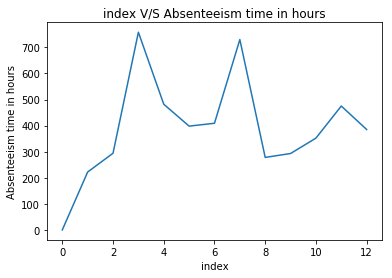

In [69]:
#Plot the aggregate 
result_plot = plotting(total_hours_per_month, "index", target, "Total Hours of Absenteeism Per Month.png", "line")
result_plot.show()

In [50]:
total_hours_per_month[target]

Month of absence
0.0       0.0
1.0     222.0
2.0     294.0
3.0     758.0
4.0     482.0
5.0     398.0
6.0     409.0
7.0     730.0
8.0     278.0
9.0     293.0
10.0    352.0
11.0    475.0
12.0    385.0
Name: Absenteeism time in hours, dtype: float64

In [139]:
y = total_hours_per_month[target]

In [148]:
X_train_total, X_test_total, y_train_total, y_test_total = split_data(X, list(y), True)

In [149]:
reg_total = Regression(X_train_total, X_test_total, y_train_total, y_test_total)

In [150]:
reg_total.prediction_ridge()

Train(10,)
Test(3,)

Cross Validation Score Ridge:-

Scores:-[  0.20790037   0.12961108 -12.95050205]

Average Accuracy:- -4.20
Train
RMSE:-136.88606891195275	R-Squared:-0.2413847829081831

Test
RMSE:-479.44745972627857	R-Squared:--13.68254130288589



In [152]:
reg_total.prediction_lasso()

Cross Validation Score Lasso:-

Scores:-[  0.18633155   0.13080309 -14.06190426]

Average Accuracy:- -4.58
Train
RMSE:-136.88338766330202	R-Squared:-0.24141450128818542

Test
RMSE:-480.73890326553317	R-Squared:--13.761745855451435



In [153]:
reg_total.prediction_SVR()

Cross Validation Score Support Vector Regressor:-

Scores:-[-0.96744924 -0.01289261 -0.00414079]

Average Accuracy:- -0.33
Train
RMSE:-165.05388420130734	R-Squared:--0.1029467485805089

Test
RMSE:-262.8688125436378	R-Squared:--3.41364413695083



In [154]:
reg_total.prediction_linear()

Cross Validation Score Simple Linear Regressor:-

Scores:-[  0.18001511   0.13137597 -14.24413589]

Average Accuracy:- -4.64
Train
RMSE:-136.88294490571352	R-Squared:-0.241419408661514

Test
RMSE:-481.5186874278192	R-Squared:--13.80967337392756



In [155]:
reg_total.prediction_random_forest()

Cross Validation Score Random Forest Regressor:-

Scores:-[-0.15457791  0.06123413 -2.37335544]

Average Accuracy:- -0.82
Train
RMSE:-71.6105621399525	R-Squared:-0.792385724291498

Test
RMSE:-496.02096770197124	R-Squared:--14.715176315789472



In [51]:
#print(total_hours_per_month[target])
print("Maximum Hours of Absenteeism:- %.2f\n" %(max(total_hours_per_month[target])))

#print("Minimum Hours of Absenteeism:- %.2f" %(min(list(total_hours_per_month[target]).remove(0))))

Maximum Hours of Absenteeism:- 758.00



In [52]:
#Average Hours of Absenteeism per month.

np.mean(np.array(total_hours_per_month[target]))

390.46153846153845

In [53]:
#If we ignore the month 0
np.mean(np.array(total_hours_per_month[target]))*(13/12)

422.99999999999994

## How much losses every month can we project in 2011 if same trend 
## of absenteeism continues?

## Stationarity of Time Series

Check the Stationarity using the Dicky Fuller Test

    $y_t$ = $\beta$_0 + $\beta$_1.$y$_(t-1) + $u_t$
 Null Hypothesis :- Non Stationarity is present =====> $\beta$_1 = 1
 
 Alternate Hypothesis:- Time Series is Stationary =======> $\beta$_1 < 1

In [35]:
temp = absent.loc[absent["Month of absence"]!=0, ["Month of absence","Absenteeism time in hours"]]

In [24]:
temp = temp.sort_values(by="Absenteeism time in hours", ascending=True)

In [25]:
temp

,Month of absence,Absenteeism time in hours
212,10.0,0.0
221,10.0,0.0
35,9.0,0.0
219,10.0,0.0
252,11.0,0.0
72,1.0,0.0
213,10.0,0.0
589,5.0,0.0
133,4.0,0.0
613,6.0,0.0


## Time Series

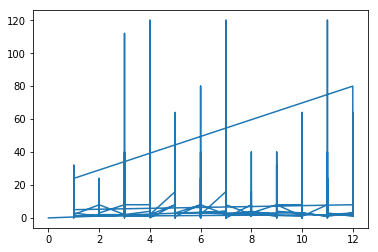

In [54]:
#Plot the Month of absence V/S Absenteeism time in hours
plt.plot(absent["Month of absence"], absent["Absenteeism time in hours"])

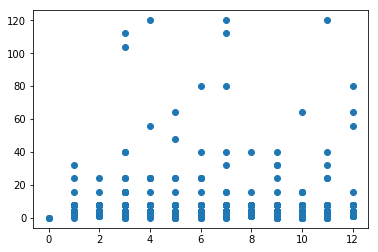

In [55]:
plt.scatter(absent["Month of absence"], absent["Absenteeism time in hours"])

### Decomposing the time Series into Seasonality, Trend and Noise

In [56]:
#Use the time-series method in statsmodel
#Set the frequency as 3
decompose = sm.tsa.seasonal_decompose(np.array(absent["Absenteeism time in hours"]), model='additive', freq = 2)
#Note:- We need to provide just the target as an input.

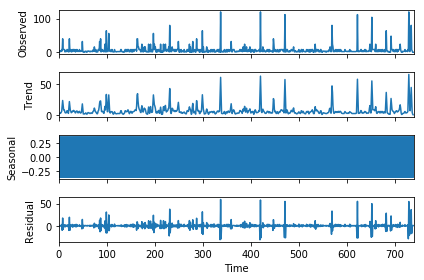

In [57]:
fig = decompose.plot()
plt.show()

In [58]:
#Check a function f(x) = Sin(x)
X_temp = range(10)
y_temp = np.sin(X_temp)

In [59]:
np.pi

3.141592653589793

In [60]:
help(sm.tsa.seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, freq=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages
    
    Parameters
    ----------
    x : array-like
        Time series. If 2d, individual series are in columns.
    model : str {"additive", "multiplicative"}
        Type of seasonal component. Abbreviations are accepted.
    filt : array-like
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by two_sided.
    freq : int, optional
        Frequency of the series. Must be used if x is not a pandas object.
        Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
    two_sided : bool
        The moving average method used in filtering.
        If True (default), a centered moving average is computed using the filt.
        If F

In [61]:
decompose_sin = sm.tsa.seasonal_decompose(y_temp, model="additive", freq = 2, two_sided=True)

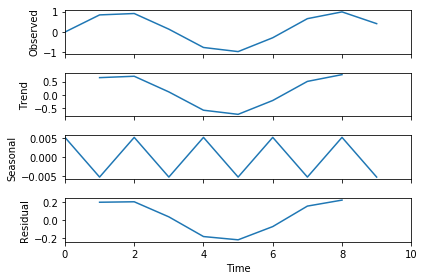

In [34]:
fig_sin = decompose_sin.plot()
plt.show()

## ARIMA - Time Series Analysis

In [62]:
import itertools

In [64]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [66]:
help(sm.tsa.statespace.SARIMAX)

Help on class SARIMAX in module statsmodels.tsa.statespace.sarimax:

class SARIMAX(statsmodels.tsa.statespace.mlemodel.MLEModel)
 |  Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors
 |  model
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The observed time-series process :math:`y`
 |  exog : array_like, optional
 |      Array of exogenous regressors, shaped nobs x k.
 |  order : iterable or iterable of iterables, optional
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters. `d` must be an integer
 |      indicating the integration order of the process, while
 |      `p` and `q` may either be an integers indicating the AR and MA
 |      orders (so that all lags up to those orders are included) or else
 |      iterables giving specific AR and / or MA lags to include. Default is
 |      an AR(1) model: (1,0,0).
 |  seasonal_order : iterable, optional
 |      The (P,D,Q,s) order of the 

In [68]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        mod = sm.tsa.statespace.SARIMAX(np.array(absent["Absenteeism time in hours"],
                                                 order=iterable,
                                                 seasonal_order=iterable,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False))
        results = mod.fit()
        print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        
        

NameError: name 'iterable' is not defined